# Task 1: Data Preparation

You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.

Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately.

###### (Please note that this is just a sample template, and please feel free to add more cells to complete of the sub-tasks in the assignment. The following existing cells are for example purposes only.)

In [49]:
# Import pandas library
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [18]:
# Load the data from the file NBA_players_stats.csv using pandas library.
file_path = "NBA_players_stats.csv"
data = pd.read_csv(file_path, sep=',', decimal='.')
data

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,212
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,NaN,0,3,3,2,0,0,0,1,20000
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,634
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,0.838,17,77,94,36,8,18,20,36,28800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,...,0.785,32,101,133,141,42,15,35,32,310
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,...,0.500,71,105,176,131,42,17,56,81,362
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,...,0.878,25,117,142,321,30,8,149,70,897
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,...,0.758,46,90,136,44,11,11,20,47,174


In [20]:
data['Pos'].value_counts()

 22     54
 23     52
 25     48
 24     43
 27     41
 21     40
 26     38
 28     37
 20     27
 30     25
 29     23
 32     21
 31     19
 19     12
 34     11
 33      7
 35      7
 36      4
 280     1
 37      1
-19      1
Name: Age, dtype: int64

In [15]:
# Clean the data
data['Pos'] = data['Pos'].str.strip()
print(data['Pos'].value_counts())

data['Pos'] = data['Pos'].str.upper()
#data['Pos'].value_counts()

data['Pos'] = data['Pos'].str.replace("SGA", "SG")
data['Pos'] = data['Pos'].str.replace("PFA", "PF")
data['Pos'] = data['Pos'].str.replace("SF.", "SF")
data['Pos'] = data['Pos'].str.replace("SFPF", "SF-PF")
#data['Pos'].value_counts()

data['Age'] = data['Age'].abs()
data['Age'] = data['Age'].replace(280, 28)
#data['Age'].sort_values()

data['Tm'] = data['Tm'].str.strip()
data['Tm'] = data['Tm'].str.upper()
data['Tm'] = data['Tm'].str.replace("H0U", "HOU")
#data['Tm'].value_counts()

data['PTS'] = data['PTS'].replace(20000, 2)
data['PTS'] = data['PTS'].replace(28800, 288)

#data.iloc[1]

SG       123
PF       104
C        100
PG        97
SF        86
PG-SG      1
SF-PF      1
Name: Pos, dtype: int64


In [52]:
def myfunc(x) :
    return x.values[0]


#Grouping players together
data = data.groupby('Player').agg({
'Rk'      : myfunc,
'Pos'     : myfunc,
'Age'     : myfunc,
'Tm'      : myfunc,
'G'       : np.sum,
'GS'      : np.sum,
'MP'      : np.sum,
'FG'      : np.sum,
'FGA'     : np.sum,
'FG%'     : np.average,
'3P'      : np.sum,
'3PA'     : np.sum,
'3P%'     : np.average,
'2P'      : np.sum,
'2PA'     : np.sum,
'2P%'     : np.average,
'FT'      : np.sum,
'FTA'     : np.sum,
'FT%'     : np.average,
'ORB'     : np.sum,
'DRB'     : np.sum,
'TRB'     : np.sum,
'AST'     : np.sum,
'STL'     : np.sum,
'BLK'     : np.sum,
'TOV'     : np.sum,
'PF'      : np.sum,
'PTS'     : np.sum,
})

data.loc["James Harden"]

Rk          182
Pos       PG-SG
Age          31
Tm          TOT
G            62
GS           62
MP         2346
FG          500
FGA        1034
FG%       0.475
3P          202
3PA         504
3P%        0.39
2P          298
2PA         530
2P%    0.560667
FT          366
FTA         426
FT%       0.864
ORB          52
DRB         432
TRB         484
AST         690
STL          72
BLK          42
TOV         262
PF          134
PTS        1568
Name: James Harden, dtype: object

In [53]:
"""
Make sure that you write the final cleaned dataframe object into a csv file
Please replace XXXXX with your dataframe variable.
"""
data.to_csv('cleaned_NBA_players_stats.csv', index=False)


# Task 2: Data Exploration

## Task 2.1 
Explore the players' total points: Please analyze the composition of the total points of the top five players with the most points.

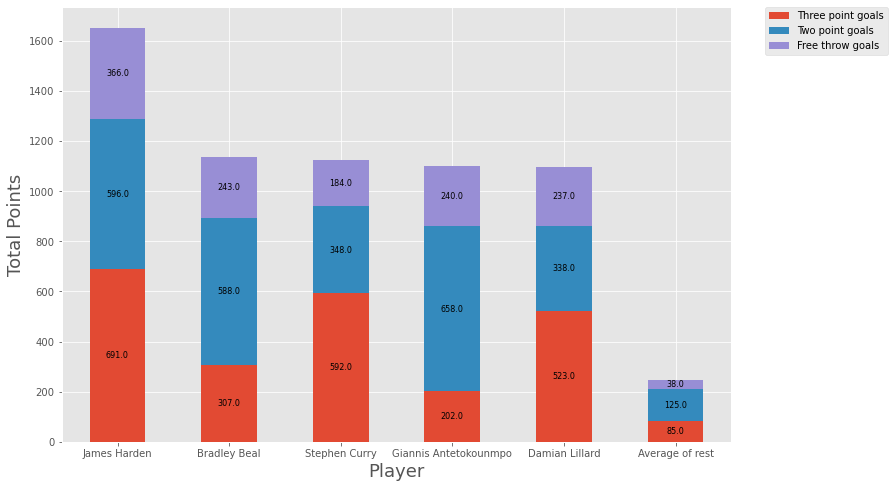

In [54]:
#Total PTS of top 5
data.sort_values(by=['PTS'], ascending=False).head(5).plot.bar(y="PTS", figsize=(8,6))

averageThree = round(3 * data.sort_values(by=['PTS'], ascending=False).tail(data.size - 5)["3P"].mean())
averagetwo = round(2 * data.sort_values(by=['PTS'], ascending=False).tail(data.size - 5)["2P"].mean())
averagefree = round(data.sort_values(by=['PTS'], ascending=False).tail(data.size - 5)["FT"].mean())

three = 3 * data.sort_values(by=['PTS'], ascending=False).head(5)["3P"] + averageThree
two = 2 * data.sort_values(by=['PTS'], ascending=False).head(5)["2P"]
free = data.sort_values(by=['PTS'], ascending=False).head(5)["FT"]

three.loc["Average of rest"] = averageThree
two.loc["Average of rest"] =  averagetwo
free.loc["Average of rest"] =  averagefree

plotdata = pd.DataFrame({ 'Three point goals' : three, 'Two point goals' : two, 'Free throw goals' : free })

plt.style.use('ggplot')

ax = plotdata.plot(stacked=True, kind='bar', figsize=(12, 8), rot='horizontal')

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    label_text = f'{height}'  # f'{height:.2f}' to format decimal values

    label_x = x + width / 2
    label_y = y + height / 2

    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_ylabel("Total Points", fontsize=18)
ax.set_xlabel("Player", fontsize=18)
plt.show()

In [55]:
data.sort_values(by=['PTS'], ascending=False).head(5)

,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
James Harden,182,PG-SG,31,TOT,62,62,2346,500,1034,0.475,...,0.864,52,432,484,690,72,42,262,134,1568
Bradley Beal,37,SG,27,WAS,32,32,1143,368,764,0.482,...,0.903,43,131,174,151,44,14,105,82,1053
Stephen Curry,109,PG,32,GSW,35,35,1194,343,718,0.478,...,0.934,17,174,191,221,46,2,111,64,1039
Giannis Antetokounmpo,12,PF,26,MIL,35,35,1189,368,661,0.557,...,0.661,64,344,408,205,44,49,128,106,1015
Damian Lillard,268,PG,30,POR,34,34,1224,315,708,0.445,...,0.933,15,130,145,271,35,9,111,53,1013


## Task 2.2 
Assuming that the data collector makes an entry error when collecting data, it can be ensured that the error occurred in the 3P, 3PA and 3P% columns, but it is not sure which player's information the error lies on. Please try to explore the error by visualization to identify how many errors there are and try to fix it.

3P% = 3P / 3PA

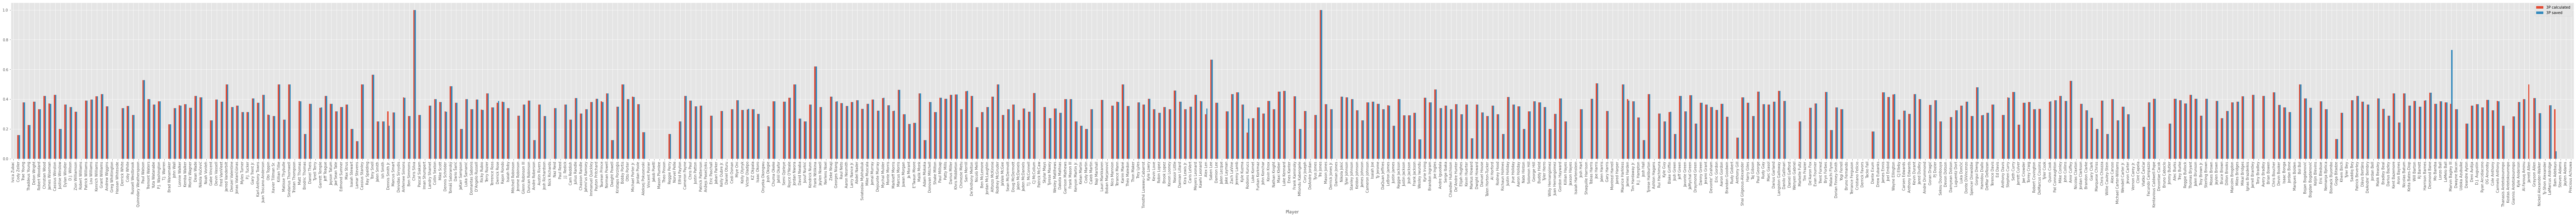

In [56]:
threep = data.sort_values(by=['Rk'], ascending=False)["3P"]
threeppercent = data.sort_values(by=['Rk'], ascending=False)["3PA"]
threep = threep.div(threeppercent)

# calculated3Ppercent = data.mul(threep, threeppercent)
saved3Ppercent = data.sort_values(by=['Rk'], ascending=False)["3P%"]

plotdata = pd.DataFrame({ '3P calculated' : threep, '3P saved' : saved3Ppercent})
plt.style.use('ggplot')

bx = plotdata.plot(stacked=False, kind='bar', figsize=(128, 8), rot='vertical')

First 25 records as the graph including every player is too difficult to read

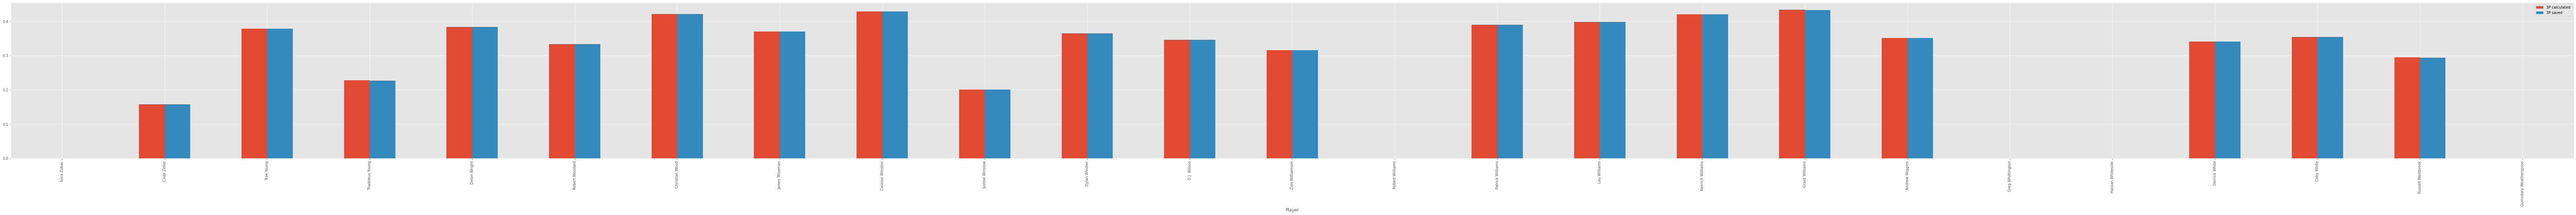

In [57]:
plotdata = pd.DataFrame({ '3P calculated' : threep, '3P saved' : saved3Ppercent}).head(25)
plt.style.use('ggplot')
bx = plotdata.plot(stacked=False, kind='bar', figsize=(128, 8), rot='vertical')

The left bar is the calculated 3P% using the values of the 3P and 3PA column using the equation 3P% = 3P / 3PA

The right bar is the 3P% column, therefore any grouped bar that are of different heights mean that there is an error.

Player
Alex Len                 True
Ashton Hagans           False
Bam Adebayo              True
Brian Bowen             False
Clint Capela            False
Cristiano Felício       False
Damian Jones             True
Daniel Gafford          False
Dennis Smith Jr.         True
Derrick Rose             True
Devon Dotson            False
Devontae Cacok          False
Drew Eubanks            False
Ed Davis                False
Enes Kanter             False
Ignas Brazdeikis        False
Isaiah Hartenstein      False
Jakob Poeltl            False
Jalen Harris            False
James Harden             True
Jared Harper            False
Jarrett Allen            True
Jaxson Hayes            False
Jordan Bone              True
Kostas Antetokounmpo    False
Marques Bolden          False
Marvin Bagley III        True
Mitchell Robinson       False
Moses Brown             False
Nick Richards           False
Norvel Pelle            False
Patrick McCaw           False
Precious Achiuwa        False
Rod

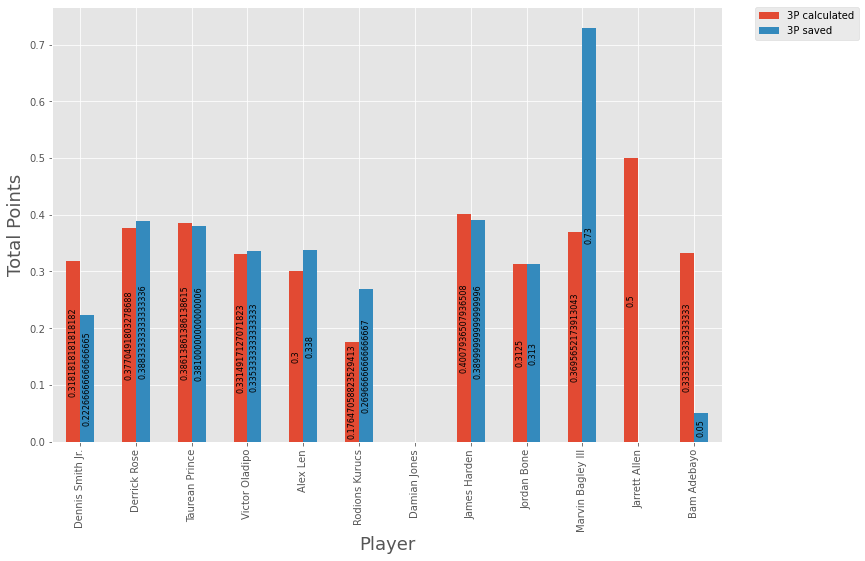

In [9]:
#print("test: " + (0 / 0))

is_incorrect =  round(data['3P%'],3) != round(data['3P'].div(data['3PA']),3)

newdata = data[is_incorrect]

# not_both_zero =  (((newdata['3P%'] == "NaN") | (newdata['3P%'] == 0))
#                   & ((newdata['3P'].div(newdata['3PA']) == "NaN")
#                      | (newdata['3P'].div(newdata['3PA']) == 0))) == False

both_nan = False == (newdata['3P%'].isna()) & (newdata['3P'].div(newdata['3PA']).isna())
print(both_nan)
newdata = newdata[both_nan]

#print(not_both_zero)
#print(data[not_both_zero])
#newdata = data
#newdata['3P%'] = newdata['3P%'].fillna(0)

print(newdata['3P%'])
#print(newdata['Damian Jones'])

threep = newdata.sort_values(by=['Rk'], ascending=False)["3P"]
threeppercent = newdata.sort_values(by=['Rk'], ascending=False)["3PA"]
threep = threep.div(threeppercent)
saved3Ppercent = newdata.sort_values(by=['Rk'], ascending=False)["3P%"]

plotdata = pd.DataFrame({ '3P calculated' : threep, '3P saved' : saved3Ppercent})

plt.style.use('ggplot')

ax = plotdata.plot(stacked=False, kind='bar', figsize=(12, 8), rot='vertical')

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    label_text = f'{height}'  # f'{height:.2f}' to format decimal values

    label_x = x + width / 2
    label_y = y + height / 2

    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8, rotation=90)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_ylabel("Total Points", fontsize=18)
ax.set_xlabel("Player", fontsize=18)
plt.show()
#bx = plotdata.plot(stacked=False, kind='bar', figsize=(24, 8), rot='vertical')


The above graph is all the players where the calculated 3P% is not equal to the

## Task 2.3 
Please analyze the relationship between the player's total points and the rest features (columns). Please use at least three other columns.

#ideas
#total points over games

In [ ]:
# Code goes after this line by adding cells
